In [1]:
import cv2
from utils import *

(512, 512)
[[49 39 33 ... 68 70 71]
 [54 45 39 ... 69 72 74]
 [62 52 46 ... 69 72 78]
 ...
 [92 92 91 ... 78 82 81]
 [92 92 91 ... 78 82 82]
 [92 92 92 ... 79 83 90]]


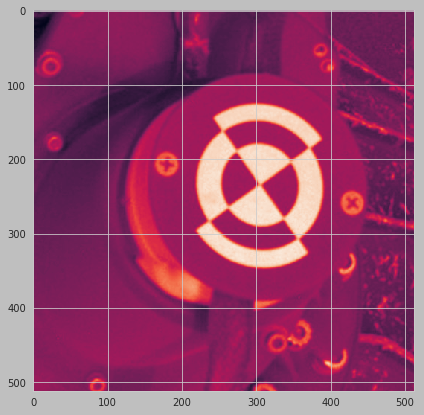

In [2]:
img_fpath = './marker_cut_rgb_512.png'
img = cv2.imread(img_fpath, cv2.IMREAD_COLOR)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img_gray.shape)
print(img_gray)
plt.imshow(img_gray);

CPU times: user 1.21 s, sys: 0 ns, total: 1.21 s
Wall time: 1.2 s


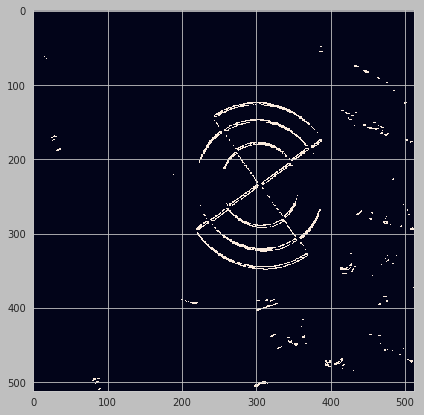

In [3]:
# img_edges = cv2.Canny(img_gray, 50, 150, apertureSize=3)
%time img_edges = Sobel(img_gray, threshold=150)

plt.imshow(img_edges);

CPU times: user 17.7 s, sys: 0 ns, total: 17.7 s
Wall time: 17.7 s


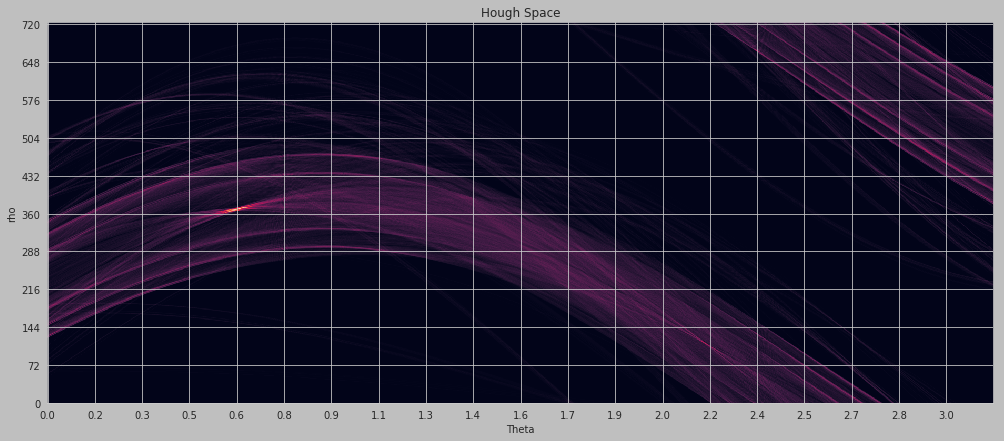

In [4]:
%time hough_space = HoughSpace(img_edges, rho=1, theta=np.pi/180/10)
plot_hs(hough_space)

69
[1345.0, 1503.0, 1549.0, 1584.0, 1608.0, 1535.0, 1512.0, 1534.0, 1249.0, 10.0, 91.0, 12.0, 154.0, 163.0, 81.0, 265.0, 450.0, 9.0, 74.0, 361.0, 450.0, 1781.0, 223.0, 266.0, 1740.0, 1728.0, 1725.0, 1698.0, 582.0, 585.0, 587.0, 1687.0, 1669.0, 1613.0, 1640.0, 1595.0, 1582.0, 1581.0, 1564.0, 1601.0, 1590.0, 1588.0, 1587.0, 1546.0, 1568.0, 1567.0, 1527.0, 1550.0, 1507.0, 1533.0, 1771.0, 1793.0, 1791.0, 1789.0, 1786.0, 1784.0, 1782.0, 1461.0, 1761.0, 1746.0, 1744.0, 1712.0, 1363.0, 1679.0, 1348.0, 1658.0, 1595.0, 1595.0, 1594.0] [0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 23.0, 31.0, 114.0, 132.0, 171.0, 187.0, 198.0, 202.0, 221.0, 260.0, 328.0, 348.0, 357.0, 368.0, 388.0, 391.0, 418.0, 432.0, 438.0, 445.0, 447.0, 463.0, 469.0, 469.0, 469.0, 470.0, 481.0, 492.0, 499.0, 504.0, 512.0, 513.0, 524.0, 524.0, 531.0, 532.0, 533.0, 536.0, 545.0, 546.0, 549.0, 557.0, 562.0, 568.0, 590.0, 601.0, 602.0, 603.0, 605.0, 606.0, 607.0, 616.0, 618.0, 627.0, 628.0, 646.0, 659.0, 666.0, 669.0, 678.0, 695.0, 717.0, 718.0

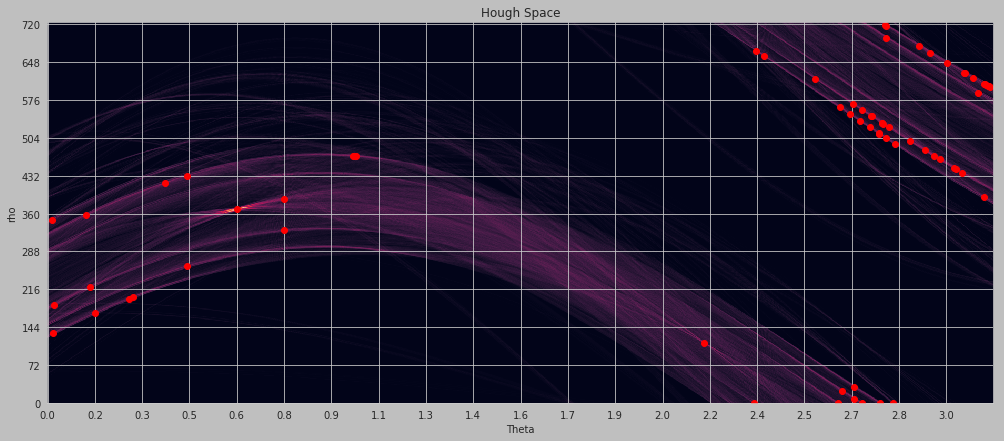

In [5]:
thetas, rhos = HoughLines(hough_space, threshold=50, neighborhood_size=20)
print(len(thetas))
print(thetas, rhos)
plt.plot(thetas, rhos, 'ro');
plot_hs(hough_space)

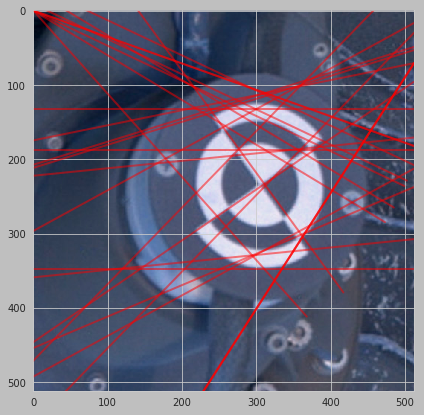

In [6]:
x_max, y_max = img_edges.shape
r_max = np.hypot(x_max, y_max)
r_dim, theta_dim = hough_space.shape

fig, ax = plt.subplots()
ax.imshow(img)

for rho, theta in zip(rhos, thetas):
    rho = round((rho*r_max)/r_dim, 1)
    theta = round((theta*np.pi)/theta_dim, 1)
    ax.autoscale(False)
    px = []
    py = []
    for i in range(-y_max-40, y_max+40, 1):
        px.append(np.cos(-theta)*i - np.sin(-theta)*rho)
        py.append(np.sin(-theta)*i + np.cos(-theta)*rho)
    ax.plot(px, py, linewidth=2, alpha=0.5, color='red')
plt.show();

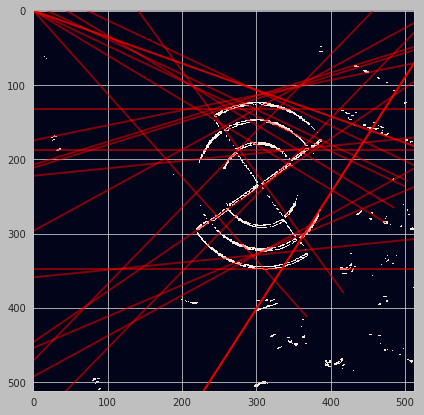

In [8]:
x_max, y_max = img_edges.shape
r_max = np.hypot(x_max, y_max)
r_dim, theta_dim = hough_space.shape

fig, ax = plt.subplots()
ax.imshow(img_edges)

for rho, theta in zip(rhos, thetas):
    rho = round((rho*r_max)/r_dim, 1)
    theta = round((theta*np.pi)/theta_dim, 1)
    ax.autoscale(False)
    px = []
    py = []
    for i in range(-y_max-40, y_max+40, 1):
        px.append(np.cos(-theta)*i - np.sin(-theta)*rho)
        py.append(np.sin(-theta)*i + np.cos(-theta)*rho)
    ax.plot(px, py, linewidth=2, alpha=0.5, color='red')
plt.show();

Some shift exists, but main `X` lines are presented

## builtin cv2 tools

Total lines: 24


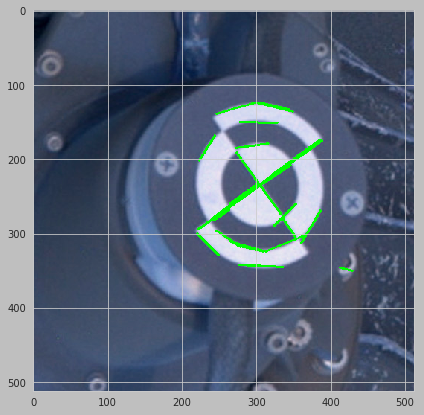

In [7]:
# lines = cv2.HoughLines(img_edges, 1, np.pi/180, 50)
# print(f'Total lines: {lines.shape[0]}')
# for line in lines:
#     for rho, theta in line:
#         a = np.cos(theta)
#         b = np.sin(theta)
#         x0 = a*rho
#         y0 = b*rho
#         x1 = int(x0 + 1000*(-b))
#         y1 = int(y0 + 1000*(a))
#         x2 = int(x0 - 1000*(-b))
#         y2 = int(y0 - 1000*(a))
#         cv2.line(img_gray, (x1, y1), (x2, y2), (0, 0, 255), 2)

lines = cv2.HoughLinesP(img_edges, 1, np.pi/180, 50, minLineLength=10, maxLineGap=10)
print(f'Total lines: {lines.shape[0]}')
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(img);